In [1]:
import numpy  as np
import pandas as pd
import os

import datetime
import warnings
import pickle
import gc

import matplotlib.pyplot as plt
import seaborn           as sns
from pandas.plotting import scatter_matrix

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute          import SimpleImputer
from sklearn.compose         import ColumnTransformer
from sklearn.preprocessing   import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler

from sklearn.cluster      import KMeans, DBSCAN
from sklearn.linear_model import LinearRegression
from sklearn.tree         import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_log_error

from IPython.display import display, FileLink, Image

#

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [13, 7]

In [2]:
agr  = pd.read_csv('agrupamento.csv')
clf1 = pd.read_csv('classificacao_Q1.csv')
clf2 = pd.read_csv('classificacao_Q2.csv')
reg1 = pd.read_csv('regressao_Q1.csv')
reg2 = pd.read_csv('regressao_Q2.csv')

- - -

In [3]:
clf2

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,target
0,-1.39917,0.96108,-0.36145,0.26092,2.78953,-1.55046,-0.79886,0.24304,1.51733,-0.03357,-1.51127,-0.97444,-0.01934,0
1,-2.48564,1.24529,-0.39431,1.06648,1.71957,-0.60296,-2.35698,-2.31878,0.95555,-2.00420,-0.75294,-3.64680,-0.55923,0
2,-0.57025,0.65495,-0.73706,0.22444,-0.44094,-0.42596,0.44267,-1.74196,-0.06599,-0.36783,0.93065,-0.72392,0.37139,0
3,2.10165,1.46236,-0.25678,2.58908,-3.40158,2.43561,0.74701,-0.65229,-0.45497,-1.57951,2.07367,1.86435,-0.37664,1
4,3.01588,-2.50913,-2.01442,2.10296,-3.05465,5.38227,0.46846,1.57586,3.02176,-0.86271,-1.14418,-0.89712,0.61823,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.35074,-1.71798,-1.10308,-0.12099,1.18152,3.86701,-0.99910,-0.81008,4.13192,-1.76628,-1.63717,-3.20229,-0.80414,1
2496,-1.68296,-1.52289,-3.09895,-0.45890,-3.28199,2.92030,0.67892,-7.21068,1.10383,-2.39771,2.72704,-6.14332,-0.96963,0
2497,-1.49938,-1.49193,-2.27411,1.57773,-4.37078,1.22671,-1.64107,-4.93347,-1.58359,-2.12111,1.31078,-6.70529,-1.77200,1
2498,0.83816,1.49354,-3.14576,3.95473,-3.93638,-1.03860,1.09382,-1.49676,-0.85550,-0.21734,1.24299,-1.12471,0.09606,0


In [4]:
!pip3 install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26818 sha256=50bd26727203bea7613d9a4ba36b40880c821ff54eb4850f600d6820af720b12
  Stored in directory: /home/dusodeth/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


In [8]:
trans = pd.DataFrame([[3213, '02/04/2018', 20],
                      [3213, '11/05/2018', 30],
                      [3213, '23/04/2018', 50],
                      [7624, '18/05/2018', 10],
                      [7624, '09/04/2018', 5],
                      [2121, '27/05/2018', 25]
                     ],
            columns=['cartao', 'data', 'valor'])

cart = pd.DataFrame([[4433, 3213],
                      [2134, 7624],
                      [9987, 2121],
                      [8765, 9864]
                     ],
            columns=['id_cliente','cartao'])

display(trans)
display(cart)

,cartao,data,valor
0,3213,02/04/2018,20
1,3213,11/05/2018,30
2,3213,23/04/2018,50
3,7624,18/05/2018,10
4,7624,09/04/2018,5
5,2121,27/05/2018,25


,id_cliente,cartao
0,4433,3213
1,2134,7624
2,9987,2121
3,8765,9864


In [9]:
import pandasql as ps

In [15]:

q1 = """
select 
    c.id_cliente as id_cliente,
    sum(t.valor) as soma_gastos_cartao
from 
    cart  as c
left join 
    trans as t
on c.cartao = t.cartao
group by c.id_cliente
order by   id_cliente
"""

print(ps.sqldf(q1, locals()))

   id_cliente  soma_gastos_cartao
0        2134                15.0
1        4433               100.0
2        8765                 NaN
3        9987                25.0


In [16]:

q1 = """
select 
    c.id_cliente as id_cliente,
    sum(t.valor) as soma_gastos_cartao
from 
    cart  as c
inner join 
    trans as t
on c.cartao = t.cartao
group by c.id_cliente
order by   id_cliente
"""

print(ps.sqldf(q1, locals()))

   id_cliente  soma_gastos_cartao
0        2134                  15
1        4433                 100
2        9987                  25


In [17]:
from sklearn.linear_model    import ElasticNet
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics         import mean_squared_error

reg = 1.0
mix = 0.01

In [20]:
# TREINO
scores = list()
X = reg1.drop(labels=['target'], inplace=False, axis=1)
y = reg1['target']

for train_id, test_id in KFold(n_splits=5).split(reg1):
    X_train, X_test = X.iloc[train_id], X.iloc[test_id]
    y_train, y_test = y.iloc[train_id], y.iloc[test_id]

    eln = ElasticNet(alpha=reg, l1_ratio=mix)
    eln.fit(X_train, y_train)

    y_pred = eln.predict(X_train)
    scores.append(mean_squared_error(y_train, y_pred))

display(scores)
display(np.mean(scores))

[0.26855726289324394,
 0.2687746746994237,
 0.2684418742938754,
 0.2686166246834847,
 0.2686109823290495]

0.26860028377981543

In [21]:
# VALIDACAO
scores = list()
X = reg1.drop(labels=['target'], inplace=False, axis=1)
y = reg1['target']

for train_id, test_id in KFold(n_splits=5).split(reg1):
    X_train, X_test = X.iloc[train_id], X.iloc[test_id]
    y_train, y_test = y.iloc[train_id], y.iloc[test_id]

    eln = ElasticNet(alpha=reg, l1_ratio=mix)
    eln.fit(X_train, y_train)

    y_pred = eln.predict(X_test)
    scores.append(mean_squared_error(y_test, y_pred))

display(scores)
display(np.mean(scores))

[0.2869963111887113,
 0.24834889042329172,
 0.2703854087759643,
 0.286636152652695,
 0.2535619559566215]

0.2691857437994568

In [22]:
from sklearn.svm             import SVR
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics         import mean_squared_error

kernel = 'linear'
reg    = 0.001

In [23]:
# TREINO
scores = list()
X = reg2.drop(labels=['target'], inplace=False, axis=1)
y = reg2['target']

for train_id, test_id in KFold(n_splits=5).split(reg2):
    X_train, X_test = X.iloc[train_id], X.iloc[test_id]
    y_train, y_test = y.iloc[train_id], y.iloc[test_id]

    svm = SVR(kernel=kernel, C=reg)
    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_train)
    scores.append(mean_squared_error(y_train, y_pred))

display(scores)
display(np.mean(scores))

[20285.36934024859,
 20358.178403929414,
 20277.25177381962,
 20114.15880566602,
 19960.222996435103]

20199.03626401975

In [24]:
# VALIDACAO
scores = list()
X = reg2.drop(labels=['target'], inplace=False, axis=1)
y = reg2['target']

for train_id, test_id in KFold(n_splits=5).split(reg2):
    X_train, X_test = X.iloc[train_id], X.iloc[test_id]
    y_train, y_test = y.iloc[train_id], y.iloc[test_id]

    svm = SVR(kernel=kernel, C=reg)
    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)
    scores.append(mean_squared_error(y_test, y_pred))

display(scores)
display(np.mean(scores))

[19860.61560786974,
 19547.28782342194,
 19891.892614244185,
 20551.366750784626,
 21188.238069366253]

20207.880173137346

In [25]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [26]:
mean_absolute_percentage_error([0.1, 0.0, 0.2, 0.1], 
                               [0.1, 0.0, 0.2, 0.1])

nan

In [27]:
mean_absolute_percentage_error([0.11, 0.01, 0.2, 0.1], 
                               [0.1, 0.0, 0.2, 0.1])

27.27272727272727

In [28]:
mean_absolute_percentage_error([0.1, 0.2, 0.2, 0.1], 
                               [0.1, 0.0, 0.2, 0.1])

25.0

In [29]:
mean_absolute_percentage_error( [0.1, 0.1, 0.1, 0.1] , 
                               [0.1, 0.0, 0.2, 0.1])

50.0

In [30]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# mean_absolute_percentage_error(y_true, y_pred)

In [35]:
y_true = [0.1, 0.0, 0.2, 0.1]
y_pred = [0.1, 0.0, 0.2, 0.1]
mean_absolute_percentage_error(y_true, y_pred)

0.0

In [39]:
y_true = [0.11, 0.01, 0.2, 0.1]
y_pred = [0.1, 0.0, 0.2, 0.1]
mean_absolute_percentage_error(y_true, y_pred)

0.2727272727272727

In [40]:
y_true = [0.1, 0.2, 0.2, 0.1] 
y_pred = [0.1, 0.0, 0.2, 0.1]
mean_absolute_percentage_error(y_true, y_pred)

0.25

In [41]:
y_true = [0.1, 0.1, 0.1, 0.1] 
y_pred = [0.1, 0.0, 0.2, 0.1]
mean_absolute_percentage_error(y_true, y_pred)

0.5

In [14]:
from sklearn.tree            import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics         import log_loss

crit = 'entropy'

In [15]:
# TREINO
scores = list()
X = clf1.drop(labels=['target'], inplace=False, axis=1)
y = clf1['target']

for train_id, test_id in KFold(n_splits=10).split(clf1):
    X_train, X_test = X.iloc[train_id], X.iloc[test_id]
    y_train, y_test = y.iloc[train_id], y.iloc[test_id]

    clf = DecisionTreeClassifier(criterion=crit)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_train)
    scores.append(log_loss(y_train, y_pred))

display(scores)
display(np.mean(scores))

[9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16]

9.992007221626413e-16

In [16]:
# TREINO
scores = list()
X = clf1.drop(labels=['target'], inplace=False, axis=1)
y = clf1['target']

for train_id, test_id in KFold(n_splits=10).split(clf1):
    X_train, X_test = X.iloc[train_id], X.iloc[test_id]
    y_train, y_test = y.iloc[train_id], y.iloc[test_id]

    clf = DecisionTreeClassifier(criterion=crit)
    clf.fit(X_train, y_train)

    y_pred = clf.predict_proba(X_train)
    scores.append(log_loss(y_train, y_pred))

display(scores)
display(np.mean(scores))

[9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16]

9.992007221626413e-16

In [17]:
# VALIDACAO
scores = list()
X = clf1.drop(labels=['target'], inplace=False, axis=1)
y = clf1['target']

for train_id, test_id in KFold(n_splits=10).split(clf1):
    X_train, X_test = X.iloc[train_id], X.iloc[test_id]
    y_train, y_test = y.iloc[train_id], y.iloc[test_id]

    clf = DecisionTreeClassifier(criterion=crit)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    scores.append(log_loss(y_test, y_pred))

display(scores)
display(np.mean(scores))

[3.0701623216127953,
 3.07015787940485,
 4.605223492483438,
 2.494498279532502,
 3.6458085948613075,
 3.453899850530796,
 4.029568334819036,
 1.7269521463693716,
 2.8782580194902305,
 2.3026028618258283]

3.127713178093015

In [18]:
# VALIDACAO
scores = list()
X = clf1.drop(labels=['target'], inplace=False, axis=1)
y = clf1['target']

for train_id, test_id in KFold(n_splits=10).split(clf1):
    X_train, X_test = X.iloc[train_id], X.iloc[test_id]
    y_train, y_test = y.iloc[train_id], y.iloc[test_id]

    clf = DecisionTreeClassifier(criterion=crit)
    clf.fit(X_train, y_train)

    y_pred = clf.predict_proba(X_test)
    scores.append(log_loss(y_test, y_pred))

display(scores)
display(np.mean(scores))

[3.453877639491069,
 3.261995548408232,
 4.221406003822417,
 2.3025850929940463,
 3.837641821656743,
 3.261995548408232,
 4.029523912739579,
 1.535056728662698,
 3.070113457325395,
 2.8782313662425576]

3.1852427119750972

In [5]:
from sklearn.linear_model    import LogisticRegression, RidgeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn                 import metrics


In [5]:
# TREINO
scores = list()
X = clf2.drop(labels=['target'], inplace=False, axis=1)
y = clf2['target']

for train_id, test_id in KFold(n_splits=10, shuffle=False).split(clf2):
    X_train, X_test = X.iloc[train_id], X.iloc[test_id]
    y_train, y_test = y.iloc[train_id], y.iloc[test_id]

    clf = LogisticRegression(penalty='l2', C=0.1)
    # clf = LogisticRegression(penalty='l2', l1_ratio=0.1)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_train)
    scores.append(metrics.roc_auc_score(y_train, y_pred))

display(scores)
display(np.mean(scores))

[0.8094275266740373,
 0.8092449444487904,
 0.8112148927022345,
 0.8048986112779152,
 0.8044612091613523,
 0.8049322500077037,
 0.8077467170775193,
 0.8110461441213653,
 0.8053847977243994,
 0.8112148927022345]

0.8079571985897551

In [6]:
# TESTE
scores = list()
X = clf2.drop(labels=['target'], inplace=False, axis=1)
y = clf2['target']

for train_id, test_id in KFold(n_splits=10, shuffle=False).split(clf2):
    X_train, X_test = X.iloc[train_id], X.iloc[test_id]
    y_train, y_test = y.iloc[train_id], y.iloc[test_id]

    clf = LogisticRegression(penalty='l2', C=0.1)
    # clf = LogisticRegression(penalty='l2', l1_ratio=0.1)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    scores.append(metrics.roc_auc_score(y_test, y_pred))

display(scores)
display(np.mean(scores))

[0.7991774307563779,
 0.8145699656491023,
 0.7610939112487101,
 0.8332691319979455,
 0.8167297453332477,
 0.8496380293420462,
 0.8136258363355636,
 0.78222049689441,
 0.8322873975409836,
 0.780766253869969]

0.8083378198968356

tentativa alternativa

In [12]:
# TREINO
scores = list()
X = clf2.drop(labels=['target'], inplace=False, axis=1)
y = clf2['target']

for train_id, test_id in KFold(n_splits=10, shuffle=False).split(clf2):
    X_train, X_test = X.iloc[train_id], X.iloc[test_id]
    y_train, y_test = y.iloc[train_id], y.iloc[test_id]
    
    
    clf = LogisticRegression(penalty='l2', C=0.1)
    # clf = LogisticRegression(penalty='l2', l1_ratio=0.1)
    clf.fit(X_train, y_train)

    y_pred = clf.decision_function(X_train)
    scores.append(metrics.roc_auc_score(y_train, y_pred))

display(scores)
display(np.mean(scores))

[0.8809533029495743,
 0.8786778330089784,
 0.8820973330467001,
 0.8769610879692548,
 0.8792497912092168,
 0.8742976701335089,
 0.8799638989169675,
 0.8808636219974715,
 0.876941371681416,
 0.8808880992425296]

0.8790894010155619

In [13]:
# TESTE
scores = list()
X = clf2.drop(labels=['target'], inplace=False, axis=1)
y = clf2['target']

for train_id, test_id in KFold(n_splits=10, shuffle=False).split(clf2):
    X_train, X_test = X.iloc[train_id], X.iloc[test_id]
    y_train, y_test = y.iloc[train_id], y.iloc[test_id]

    clf = LogisticRegression(penalty='l2', C=0.1)
    # clf = LogisticRegression(penalty='l2', l1_ratio=0.1)
    clf.fit(X_train, y_train)

    y_pred = clf.decision_function(X_test)
    scores.append(metrics.roc_auc_score(y_test, y_pred))

display(scores)
display(np.mean(scores))

[0.862155388471178,
 0.8786052239289649,
 0.8445562435500515,
 0.896828454031844,
 0.874013727628456,
 0.9220321609327952,
 0.8692743180648482,
 0.8589544513457557,
 0.8975409836065574,
 0.8617776057791537]

0.8765738557339604

In [53]:
np.log2(10000000)

23.253496664211536

In [52]:
2**10

1024

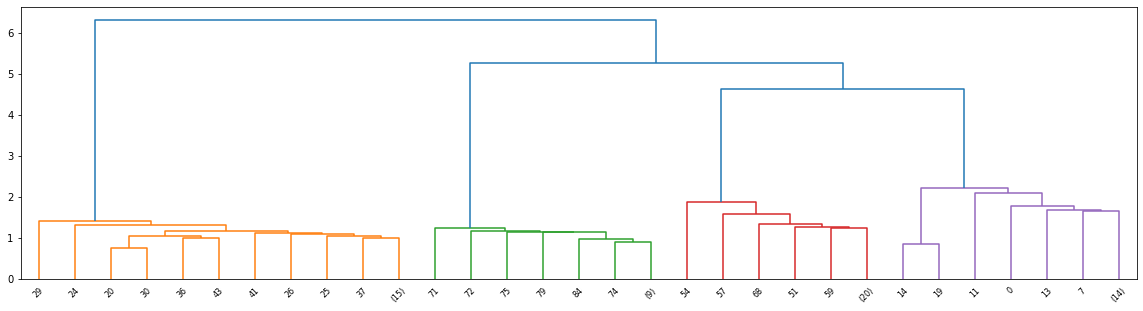

In [54]:
import scipy.cluster.hierarchy as hierarchical

plt.figure(figsize=(20,5))
dend = hierarchical.dendrogram( hierarchical.linkage(agr, method='single'), truncate_mode='level', p=7 )